In [1]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

import scipy

from itertools import combinations

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

import os
import sys

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools



# sns.set_style('dark')
# sns.set_style('ticks')
# plt.style.use('dark_background')

In [3]:
merged_fitness = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)

merged_fitness = merged_fitness[~merged_fitness['source_publication'].isin(['Li2019'])]

WT Evo2D 484 236 121
CYR1 Evo2D 535 224 68
GPB2 Evo2D 1219 229 17
TOR1 Evo2D 726 317 57
IRA1_MIS Evo2D 142 16 90
IRA1_NON Evo2D 95 0 95


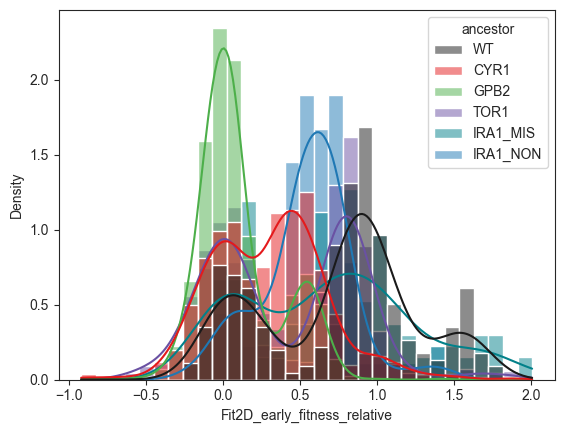

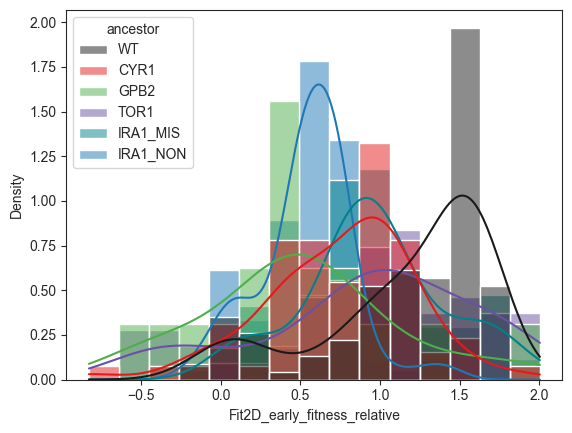

In [35]:
evo_cond_list = ['Evo2D']
anc_list = ['WT','CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON']

for evo_cond in evo_cond_list:
    
    this_condition = merged_fitness[merged_fitness['evolution_condition']==evo_cond]
    sns.histplot(this_condition,x='Fit2D_early_fitness_relative',
                 hue='ancestor',common_norm=False,stat='density',kde=True,
                 hue_order=anc_list,
                 palette=[tools.anc_color_map[anc] for anc in anc_list])
    
    for anc in anc_list:
    
       
        this_pairing = merged_fitness[(merged_fitness['ancestor']==anc) & (merged_fitness['evolution_condition']==evo_cond)]
        pure_diploids = this_pairing[this_pairing['class_new']=='pure_diploids']
        adaptive_nondiploids = this_pairing[~this_pairing['class_new'].isin(['pure_diploids','neutral_haploids'])]
        print(anc,evo_cond,len(this_pairing),len(pure_diploids),len(adaptive_nondiploids))
        
plt.figure()

for evo_cond in evo_cond_list:
    
    this_condition = merged_fitness[merged_fitness['evolution_condition']==evo_cond]
    adaptive_nondiploids = this_condition[~this_condition['class_new'].isin(['pure_diploids','neutral_haploids'])]
    sns.histplot(adaptive_nondiploids,x='Fit2D_early_fitness_relative',
                 hue='ancestor',common_norm=False,stat='density',kde=True,
                 hue_order=anc_list,
                 palette=[tools.anc_color_map[anc] for anc in anc_list])
    
    

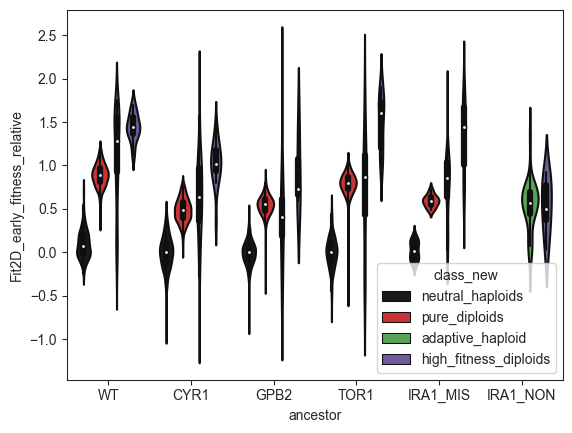

In [33]:
this_condition = merged_fitness[merged_fitness['evolution_condition']==evo_cond]


for evo_cond in evo_cond_list:
    
    this_condition = merged_fitness[merged_fitness['evolution_condition']==evo_cond]
    
    sns.violinplot(this_condition,x='ancestor',y='Fit2D_early_fitness_relative',
                   hue='class_new',order=anc_list,hue_order=['neutral_haploids','pure_diploids','adaptive_haploid','high_fitness_diploids'],
                   palette=[tools.anc_color_map[anc] for anc in anc_list])
    
#     sns.violinplot(this_condition,x='ancestor',y='Fit2D_early_fitnes')

#     for anc in anc_list:
        
        